# CS375 Assignment 2 Lab Report - Colorful Colorization
#### Group 6 

## Part 1: Task Generalization

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database

In [2]:
from model_switcher import *

In [3]:
colorful_model = model_switcher(model_name = 'colorful_model',
                          data_name = 'cifar10',
                          loss_name = 'colorful_loss')

In [4]:
vars(colorful_model)

{'collname': 'colorful_model_colorful_loss',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7fe552fc0940>,
 'exp_id': '',
 'layers': ['conv4_3', 'conv8_3'],
 'loss_fn': <function losses.colorful_loss>,
 'loss_name': 'colorful_loss',
 'model_fn': <function models.colorful_model>,
 'model_name': 'colorful_model',
 'test_id': ''}

In [1]:
coll, db = p_get_coll(vars(colorful_model)['collname'], vars(colorful_model)['dbname'])
print(coll)

coll.distinct('exp_id')

NameError: name 'p_get_coll' is not defined

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

experiment19_help
experiment19


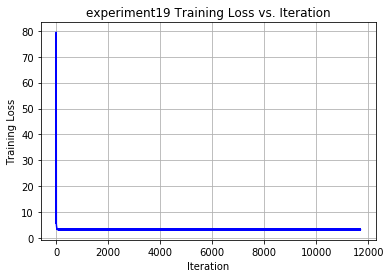

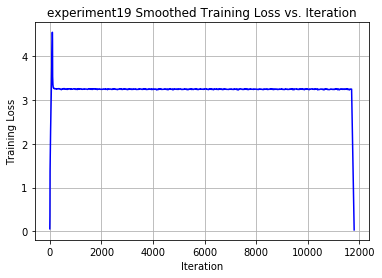

In [9]:
# TODO Double check this. Bit hacky

print(coll.distinct('exp_id')[-1])
texp_id = coll.distinct('exp_id')[0]
print(texp_id)
p22_training(texp_id,coll)

### Plotting the validation results

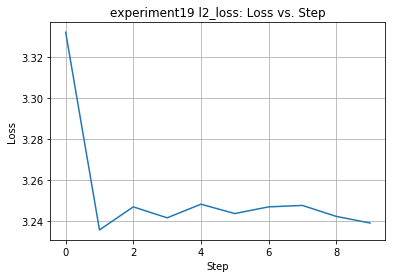

In [10]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll)
plot_l2_loss(l2_loss, texp_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [11]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [12]:
def show_row(in_row, num_show = None):
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

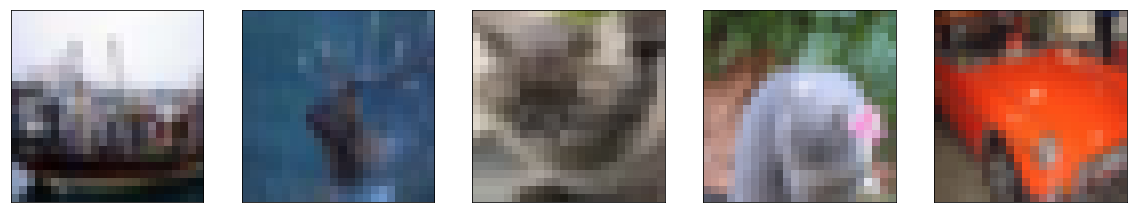

In [13]:
show_row(np_inputs[-1,:].squeeze(), 5)

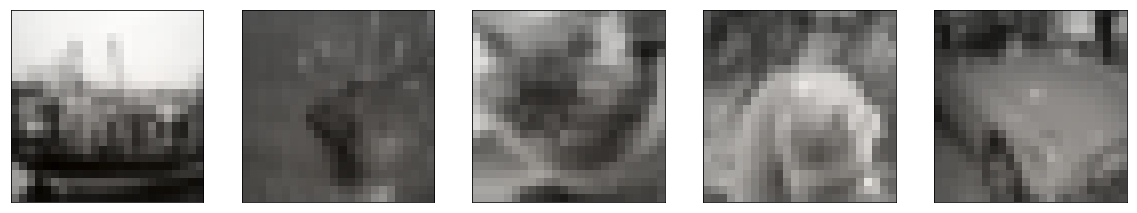

In [14]:
show_row(np_prediction[-1,:].squeeze(), 5)

## Part 2: Representational Similararity Analysis (RSA)

In [17]:
test_id = 'experiment19_help'
data, uni_steps, uni_var = get_neural_exp_data(coll, test_id)

### RDM results

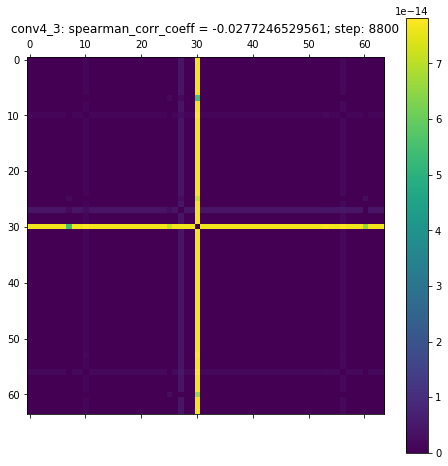

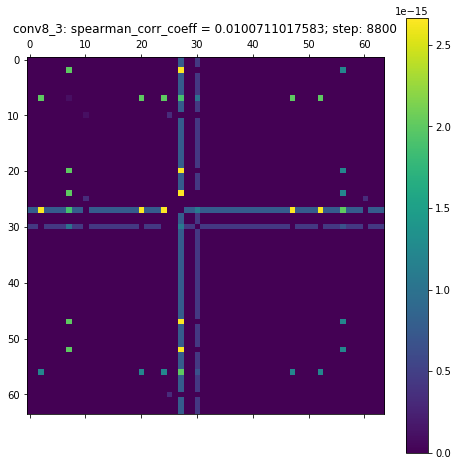

In [21]:
for ivar in uni_var:
    for istep in uni_steps:
        plot_rdms(data[(ivar, istep)], vars(colorful_model)['layers'], istep);

### Analyzing the categorization results

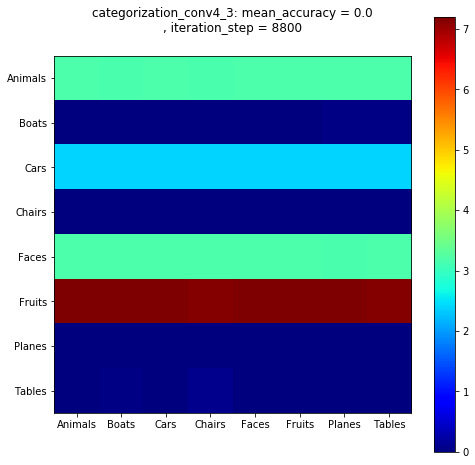

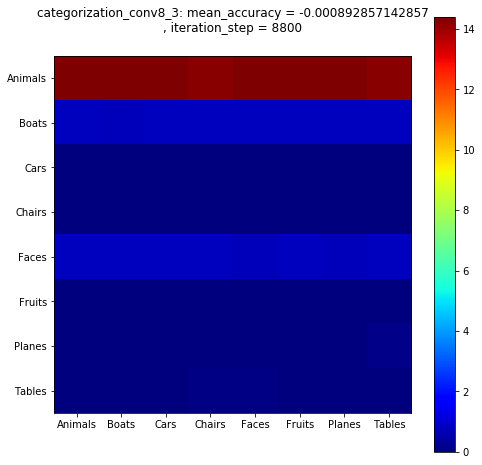

In [23]:
for ivar in uni_var:
    for istep in uni_steps:
        plot_categorization_results(data[(ivar, istep)], vars(colorful_model)['layers'], istep)

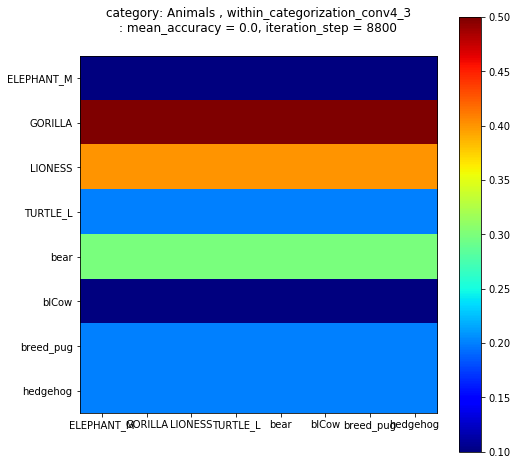

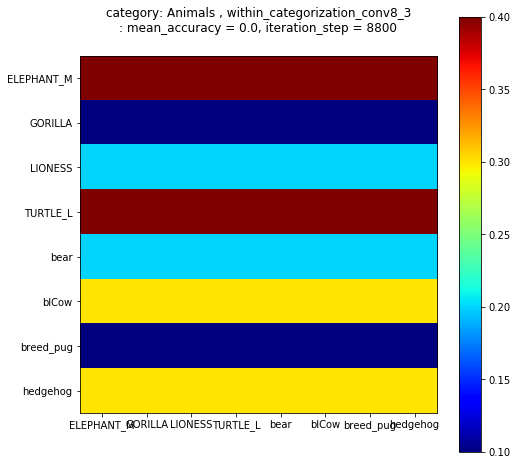

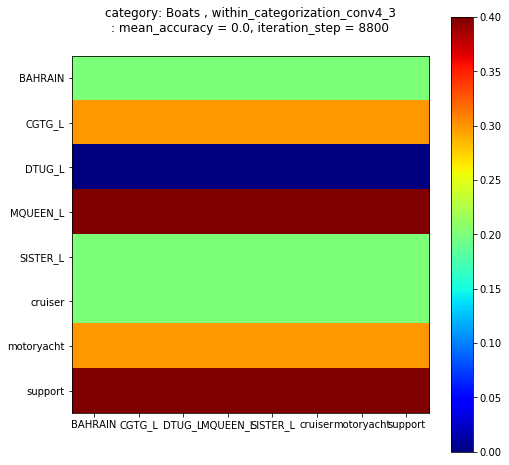

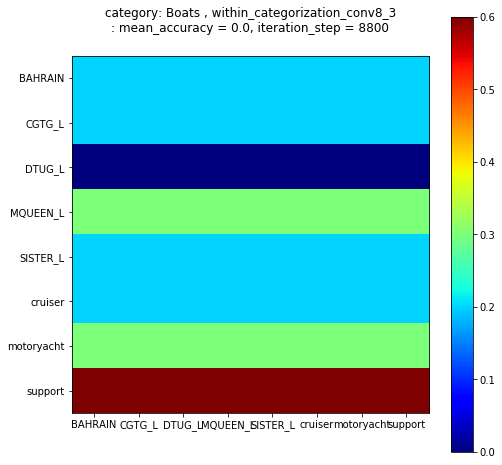

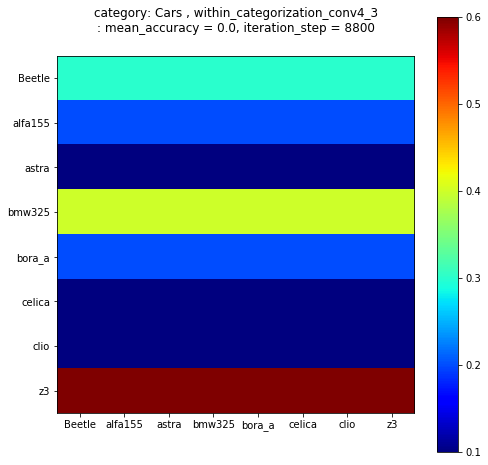

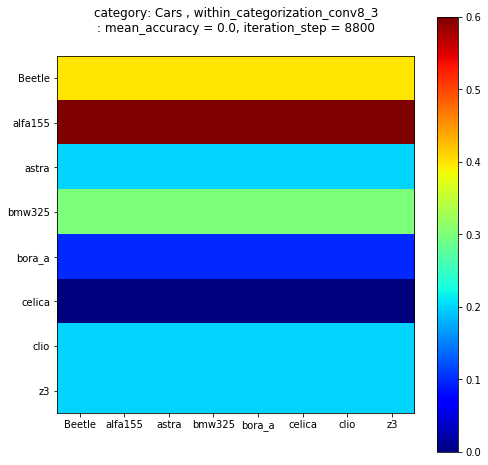

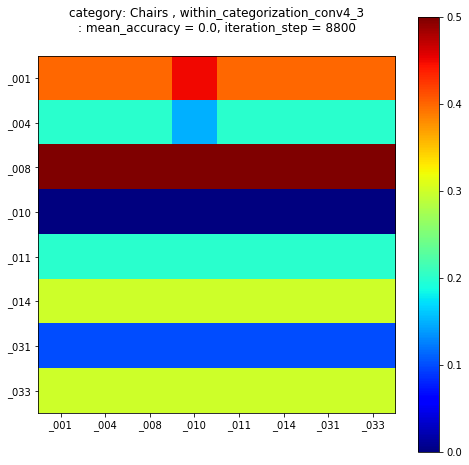

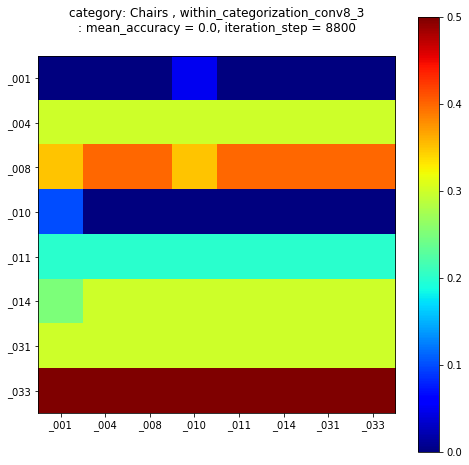

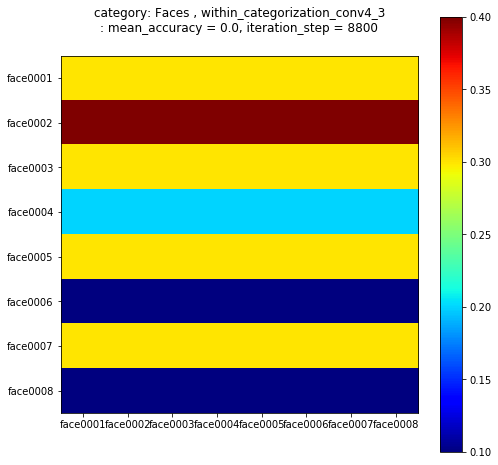

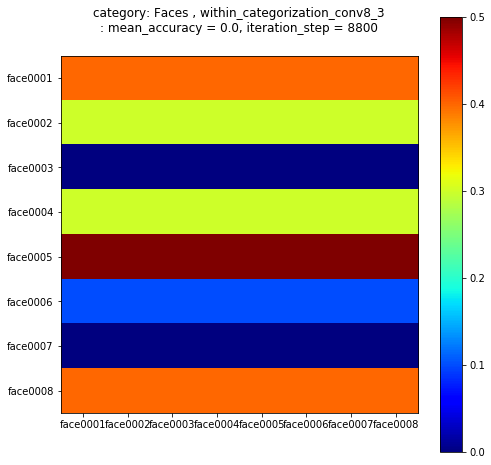

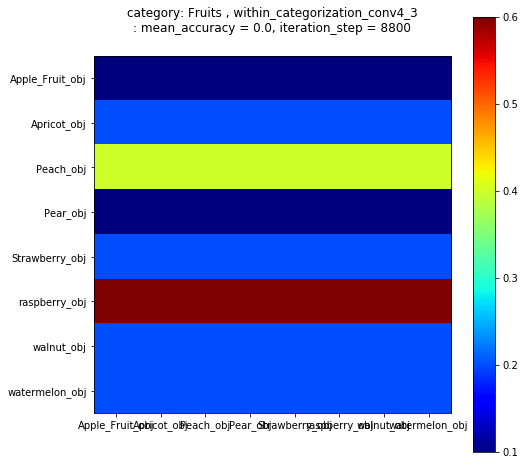

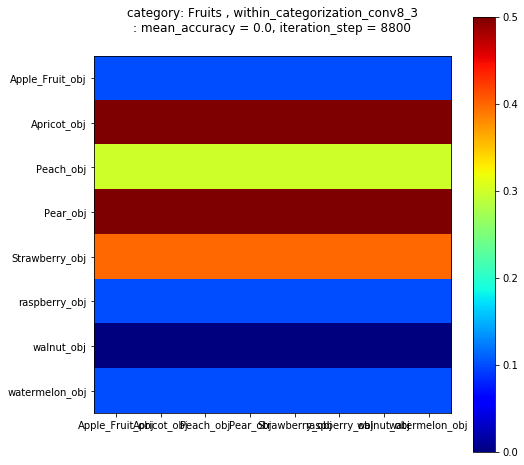

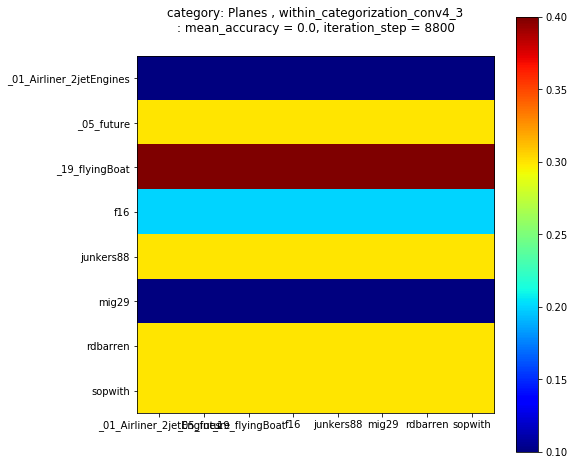

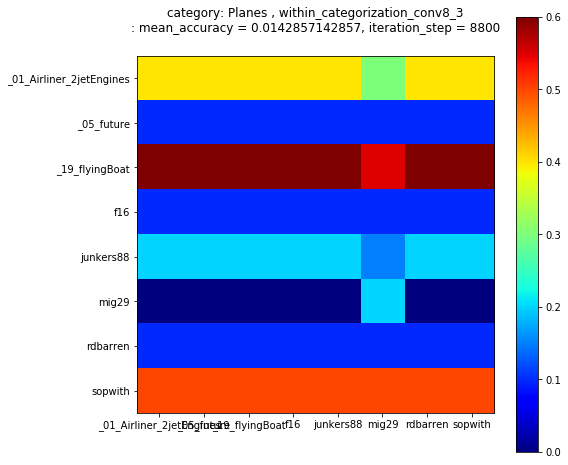

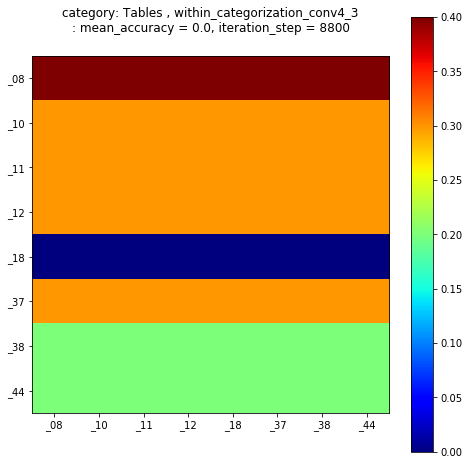

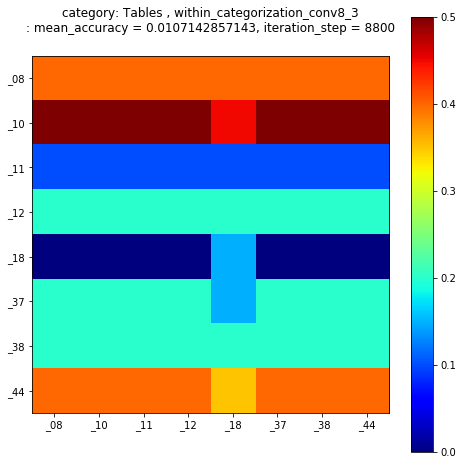

In [25]:
for ivar in uni_var:
    for istep in uni_steps:
        categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
        for category in categories:
            plot_categorization_results(data[(ivar, istep)], vars(colorful_model)['layers'], istep, category=category)

### Continuous estimation results

In [51]:
for ivar in uni_var:
    for istep in uni_steps:
        print("Continuous Estimation Task for ty \n")
        for layer in vars(colorful_model)['layers']:
            for k in data[(ivar, istep)]['continuous_' + layer].keys():
                print  data[(ivar, istep)]['continuous_' + layer][k]
            print("")
            print data[(ivar, istep)]['continuous_' + layer]['rsquared_loss_stderror']

Continuous Estimation Task for ty 

[1.0130496781871237, 1.0, 1.0, 1.1142281475151419, 1.0, 1.0, 1.0, 1.028082879172042, 1.0, 1.0, 1.0, nan, 1.0, 1.1241453384743771, 1.1325822945784008, 1.0, nan, 1.0, nan, nan]
0.0118148843586
[1.020647405754747, 1.0067207012804624, 1.0081452518727088, 1.0047823586260796, 1.0307999940957475, 1.0430487470285574, 1.0011058018733254, 1.0113987170376721, 1.0058583364015554, 1.0311234559483777, 1.0059662839994896, 1.0039218977005822, 1.000216814170181, 1.004810303496265, 1.0000621198908617, 1.0006355172400636, 1.011008066215622, 1.0019197706124352, 1.0000640684554594, 1.0035731040652038]
nan
1.00979043579
nan

0.0118148843586
[1.0208713717232856, nan, 1.0, 0.966857309179791, 1.0, nan, nan, 1.0280054809754597, 1.0, 0.9145621567062994, nan, 0.9299686393486616, 0.9897025223755331, 1.124161083035172, 1.1326282372224892, nan, 0.999324127361254, 1.0, nan, 1.0096013611473746]
0.0118148843586
[1.0206474057548034, 1.0067207012804615, 1.0081452518727072, 1.0047823586

### Part 3: Neural Response Regression

In [48]:
def plot_regression_results(data, target_layers, step):
    """
    Prints out the noise corrected multi rsquared loss for each layer.
    
    You will need to EDIT this function.
    """
    for layer in target_layers:
            k = 'it_regression_' + layer
            print(data.keys())
            print(data[k])
            #print('step', step, 'layer', layer, 1 - data[k]['noise_corrected_multi_rsquared_loss'])

for ivar in uni_var:
    for istep in uni_steps:
        plot_regression_results(data[(ivar, istep)], vars(colorful_model)['layers'], istep)

[u'continuous_conv8_3', u'within_categorization_conv4_3', u'continuous_conv4_3', u'rdm_conv4_3', u'rdm_conv8_3', u'within_categorization_conv8_3', u'categorization_conv8_3', u'it_regression_conv4_3', u'categorization_conv4_3', u'it_regression_conv8_3', u'spearman_corrcoef_conv4_3', u'rdm_it', u'spearman_corrcoef_conv8_3']
nan
[u'continuous_conv8_3', u'within_categorization_conv4_3', u'continuous_conv4_3', u'rdm_conv4_3', u'rdm_conv8_3', u'within_categorization_conv8_3', u'categorization_conv8_3', u'it_regression_conv4_3', u'categorization_conv4_3', u'it_regression_conv8_3', u'spearman_corrcoef_conv4_3', u'rdm_it', u'spearman_corrcoef_conv8_3']
nan
